# Libraries

In [42]:
import pandas as pd

# visualization
import seaborn as sns

# basic feature engineering
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTENC

# Preprocessing
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# evaluation
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

***

# Data Loading

In [43]:
data = pd.read_csv("bank-additional-full.csv", delimiter=';')

In [44]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

display(data.head(10))
display(data.tail(10))

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41178,62,retired,married,university.degree,no,no,no,cellular,nov,thu,483,2,6,3,success,-1.1,94.767,-50.8,1.031,4963.6,yes
41179,64,retired,divorced,professional.course,no,yes,no,cellular,nov,fri,151,3,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41180,36,admin.,married,university.degree,no,no,no,cellular,nov,fri,254,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41181,37,admin.,married,university.degree,no,yes,no,cellular,nov,fri,281,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41182,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,fri,112,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,no
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,239,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


Data Successfully loaded. Let's do a few checks.

### Check Missing Values

In [45]:
print(f"Before: {data.isna().sum().sum()}")
data.dropna(inplace=True)
print(f"After: {data.isna().sum().sum()}")


Before: 0
After: 0


### Check Duplicates

In [46]:
print(f"Before: {data.duplicated().sum()}")
data.drop_duplicates(inplace=True)
print(f"After: {data.duplicated().sum()}")

Before: 12
After: 0


### Check 'Unknown' Values

In [47]:
def check_unknown(data):
    unknown_exists = (data == 'unknown').any().any()

    if unknown_exists:
        print("Unknown value exists in the DataFrame.")
    else:
        print("Unknown value does not exist in the DataFrame.")

check_unknown(data)

Unknown value exists in the DataFrame.


Not yet perfect. Let's do some data cleaning first.

***

# Data Cleaning

In [48]:
jobCol_categories = data['job'].unique().tolist()
newJobCol_cats = []

for each in jobCol_categories:
    newEach = each.capitalize()
    newEach = newEach.replace('.','')
    newJobCol_cats.append(newEach)
    
jobColReplace_Dict = dict(zip(jobCol_categories, newJobCol_cats))

data['job'] = data['job'].replace(jobColReplace_Dict)

# Cleaning value pada kolom 'marital'
maritalCol_categories = data['marital'].unique().tolist()
newmaritalCol_cats = []

for each in maritalCol_categories:
    newEach = each.capitalize()
    newmaritalCol_cats.append(newEach)

maritalColReplace_Dict= dict(zip(maritalCol_categories, newmaritalCol_cats))

data['marital'] = data['marital'].replace(maritalColReplace_Dict)

# Cleaning value pada kolom 'education'
educationCol_categories = data['education'].unique().tolist()
neweducationCol_cats = []

for each in educationCol_categories:
    newEach = each.replace('.', ' ')
    newEach = newEach.replace('4y', '(4 years)') if '4y' in newEach else newEach
    newEach = newEach.replace('6y', '(6 years)') if '6y' in newEach else newEach
    newEach = newEach.replace('9y', '(9 years)') if '9y' in newEach else newEach
    newEach = newEach.title()
    neweducationCol_cats.append(newEach)

educationColReplace_Dict= dict(zip(educationCol_categories, neweducationCol_cats))
data['education'] = data['education'].replace(educationColReplace_Dict)

# Cleaning value pada kolom 'default'
defaultCol_categories = data['default'].unique().tolist()
newdefaultCol_cats = []

for each in defaultCol_categories:
    newEach = each.capitalize()
    newdefaultCol_cats.append(newEach)
    
defaultColReplace_Dict= dict(zip(defaultCol_categories, newdefaultCol_cats))

data['default'] = data['default'].replace(defaultColReplace_Dict)


# Cleaning value pada kolom 'housing'
housingCol_categories = data['housing'].unique().tolist()
newhousingCol_cats = []

for each in housingCol_categories:
    newEach = each.capitalize()
    newhousingCol_cats.append(newEach)
    
housingColReplace_Dict= dict(zip(housingCol_categories, newhousingCol_cats))

data['housing'] = data['housing'].replace(housingColReplace_Dict)


# Cleaning value pada kolom 'contact'
contactCol_categories = data['contact'].unique().tolist()
newcontactCol_cats = []

for each in contactCol_categories:
    newEach = each.capitalize()
    newcontactCol_cats.append(newEach)
    
contactColReplace_Dict= dict(zip(contactCol_categories, newcontactCol_cats))

data['contact'] = data['contact'].replace(contactColReplace_Dict)

# Cleaning value pada kolom 'loan'
loanCol_categories = data['loan'].unique().tolist()
newLoanCol_cats = []

for each in loanCol_categories:
    newEach = each.capitalize()
    newLoanCol_cats.append(newEach)
    
loanColReplace_Dict= dict(zip(loanCol_categories, newLoanCol_cats))

data['loan'] = data['loan'].replace(loanColReplace_Dict)

# Cleaning value pada kolom 'month'
monthCol_categories = ['mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
newmonthCol_cats = [3,4,5,6,7,8,9,10,11,12]
    
monthColReplace_Dict= dict(zip(monthCol_categories, newmonthCol_cats))

data['month'] = data['month'].replace(monthColReplace_Dict)

# Cleaning value pada kolom 'day_of_week'
day_of_weekCol_categories = ['mon', 'tue', 'wed', 'thu', 'fri']
newday_of_weekCol_cats = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

day_of_weekColReplace_Dict= dict(zip(day_of_weekCol_categories, newday_of_weekCol_cats))

data['day_of_week'] = data['day_of_week'].replace(day_of_weekColReplace_Dict)

# Cleaning value pada kolom 'poutcome'
poutcomeCol_categories = data['poutcome'].unique().tolist()
newpoutcomeCol_cats = []

for each in poutcomeCol_categories:
    newEach = each.replace('non', 'non-') if 'non' in each else each
    newEach = newEach.capitalize()
    newpoutcomeCol_cats.append(newEach)
    
poutcomeColReplace_Dict= dict(zip(poutcomeCol_categories, newpoutcomeCol_cats))

data['poutcome'] = data['poutcome'].replace(poutcomeColReplace_Dict)

# Cleaning value pada kolom 'y'
yCol_categories = data['y'].unique().tolist()
newyCol_cats = []

for each in yCol_categories:
    newEach = each.capitalize()
    newyCol_cats.append(newEach)
    
yColReplace_Dict= dict(zip(yCol_categories, newyCol_cats))

data['y'] = data['y'].replace(yColReplace_Dict)


## Rename columns
data.rename(columns={
'age': 'age',
'job': 'occupation',
'marital': 'marital_status',
'education': 'education_level',
'default': 'credit_default',
'housing': 'housing_loan',
'loan': 'personal_loan',
'contact': 'contact_method',
'month': 'last_contact_month',
'day_of_week': 'last_contact_day_of_week',
'duration': 'last_contact_duration',
'campaign': 'campaign_contacts',
'pdays': 'days_since_previous_contact',
'previous': 'previous_contacts',
'poutcome': 'previous_campaign_outcome',
'emp.var.rate': 'employment_variation_rate',
'cons.price.idx': 'consumer_price_index',
'cons.conf.idx': 'consumer_confidence_index',
'euribor3m': 'euribor_3_month_rate',
'nr.employed': 'number_employed',
'y': 'subscription_status'
}, inplace=True)


# Replace 'unknown' values with None
data.replace('Unknown', None, inplace=True)

# melakukan drop null
data.dropna(inplace=True)

# melakukan drop duplicate
data.drop_duplicates(inplace=True)

In [49]:
check_unknown(data)

Unknown value does not exist in the DataFrame.


Perfect! Let's move on to Feature Engineering phase.

***

# Feature Engineering

Few things we will do here:
- Encode target variable
- Split data
- Target Balancing
- Preprocessing

**Copy**

### Encode Target Variable

We do the following encoding to the target variable.
- 'Yes' -> 1
- 'No' -> 0

In [50]:
data['subscription_status'] = data['subscription_status'].replace({'Yes': 1, 'No': 0})

### Data Split

We split the data into feature (X) and target (y)

In [51]:
X = data.drop(columns=['subscription_status'])
y = data['subscription_status']

We split further into Train-, Val- and Test-set

In [52]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y,test_size=0.25, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=42, stratify=y_train_val)

# Check the size
print(f"Shape data train : {X_train.shape}")
print(f"Shape data test : {X_test.shape}")
print(f"Shape data val : {X_val.shape}")

Shape data train : (19429, 20)
Shape data test : (7620, 20)
Shape data val : (3429, 20)


Looking good. Moving on, we might need some balancing. Let's check our target's distribution.

### Balancing

subscription_status
0    26620
1     3858
Name: count, dtype: int64

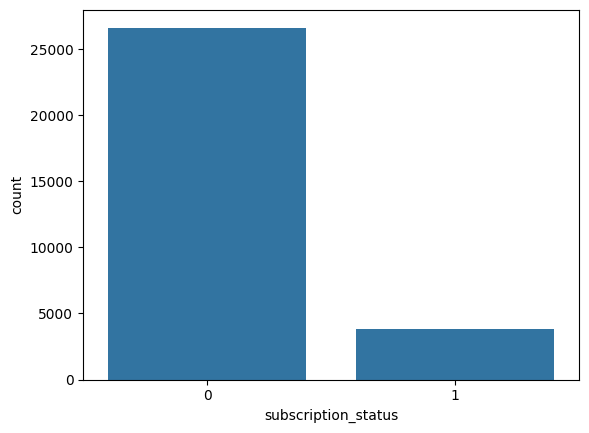

In [53]:
sns.barplot(y.value_counts())
y.value_counts()

Yep, very unbalanced. Okay let's do balancing first.

In [54]:
smotenc = SMOTENC([1,2,3,4,5,6,7,9,14], random_state = 22)
X_train, y_train = smotenc.fit_resample(X_train, y_train)
y_train.value_counts()

subscription_status
0    16970
1    16970
Name: count, dtype: int64

Looking good. Let's move on to preprocessing now.

### Preprocessing

**Defining Components**

In [55]:
# Define Outlier handling method
winsoriser = Winsorizer(capping_method='iqr',tail='both',fold=1.5,variables=['last_contact_duration', 'campaign_contacts'])

# Define the Scaling method
scaler = StandardScaler()

# Define the Encoder
encoder = OneHotEncoder(handle_unknown='ignore')

# Columns that will be dropped
drop_columns = ['age', 'last_contact_month','occupation', 'credit_default', 'personal_loan']

# Columns that will be scaled
scaled_columns = ['last_contact_duration', 'campaign_contacts', 
         'days_since_previous_contact', 'previous_contacts', 'employment_variation_rate', 
         'consumer_price_index', 'consumer_confidence_index', 'euribor_3_month_rate', 
         'number_employed']

# Columns that will be encoded
encoded_columns = ['marital_status', 'education_level', 'housing_loan', 'contact_method', 
                   'last_contact_day_of_week', 'previous_campaign_outcome']

**Create Preprocessing Pipeline**

In [56]:

scaling_transformer = Pipeline(steps=[
    ('capping', winsoriser),
    ('scaler', scaler)
])

encoding_transformer = Pipeline(steps=[
    ('encoder', encoder)
])

# Create ColumnTransformer to apply different preprocessing steps to different columns
preprocessor = ColumnTransformer(transformers=[
    ('scaling', scaling_transformer, scaled_columns),
    ('encoding', encoding_transformer, encoded_columns),
    ('drop', 'drop', drop_columns) # Drop specified columns
])

# Model

### Define

In [57]:
# define logistic regression
model_lr = Pipeline(
    steps=[("preprocessor", preprocessor), ("logreg", LogisticRegression(random_state=42))]
)

# define knn
model_knn = Pipeline(
    steps=[("preprocessor", preprocessor), ("knn", KNeighborsClassifier())]
)

# define svc
model_svc = Pipeline(
    steps=[("preprocessor", preprocessor), ("svc", SVC(probability=True, random_state=42))]
)

# define decision tree
model_dt = Pipeline(
    steps=[("preprocessor", preprocessor), ("decision_tree", DecisionTreeClassifier(random_state=42))]
)

# define random forest
model_rf = Pipeline(
    steps=[("preprocessor", preprocessor), ("random_forest", RandomForestClassifier(random_state=42))]
)

### Train

In [58]:
model_lr.fit(X_train, y_train)

c:\Users\CIEL_W\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling',
                                                  Pipeline(steps=[('capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['last_contact_duration',
                                                                                         'campaign_contacts'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['last_contact_duration',
                                                   'campaign_contacts',
                                                   'days_since_previous_contact',
                                                   'previous_contacts',
                                                   'employment_...
                                                   'number_employed']),
                                                 ('encoding',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital_status',
                                                   'education_level',
                                                   'housing_loan',
                                                   'contact_method',
                                                   'last_contact_day_of_week',
                                                   'previous_campaign_outcome']),
                                                 ('drop', 'drop',
                                                  ['age', 'last_contact_month',
                                                   'occupation',
                                                   'credit_default',
                                                   'personal_loan'])])),
                ('logreg', LogisticRegression(random_state=42))])

In [59]:
model_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling',
                                                  Pipeline(steps=[('capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['last_contact_duration',
                                                                                         'campaign_contacts'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['last_contact_duration',
                                                   'campaign_contacts',
                                                   'days_since_previous_contact',
                                                   'previous_contacts',
                                                   'employment_...
                                                   'number_employed']),
                                                 ('encoding',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital_status',
                                                   'education_level',
                                                   'housing_loan',
                                                   'contact_method',
                                                   'last_contact_day_of_week',
                                                   'previous_campaign_outcome']),
                                                 ('drop', 'drop',
                                                  ['age', 'last_contact_month',
                                                   'occupation',
                                                   'credit_default',
                                                   'personal_loan'])])),
                ('knn', KNeighborsClassifier())])

In [60]:
model_svc.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling',
                                                  Pipeline(steps=[('capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['last_contact_duration',
                                                                                         'campaign_contacts'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['last_contact_duration',
                                                   'campaign_contacts',
                                                   'days_since_previous_contact',
                                                   'previous_contacts',
                                                   'employment_...
                                                   'number_employed']),
                                                 ('encoding',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital_status',
                                                   'education_level',
                                                   'housing_loan',
                                                   'contact_method',
                                                   'last_contact_day_of_week',
                                                   'previous_campaign_outcome']),
                                                 ('drop', 'drop',
                                                  ['age', 'last_contact_month',
                                                   'occupation',
                                                   'credit_default',
                                                   'personal_loan'])])),
                ('svc', SVC(probability=True, random_state=42))])

In [61]:
model_dt.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling',
                                                  Pipeline(steps=[('capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['last_contact_duration',
                                                                                         'campaign_contacts'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['last_contact_duration',
                                                   'campaign_contacts',
                                                   'days_since_previous_contact',
                                                   'previous_contacts',
                                                   'employment_...
                                                 ('encoding',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital_status',
                                                   'education_level',
                                                   'housing_loan',
                                                   'contact_method',
                                                   'last_contact_day_of_week',
                                                   'previous_campaign_outcome']),
                                                 ('drop', 'drop',
                                                  ['age', 'last_contact_month',
                                                   'occupation',
                                                   'credit_default',
                                                   'personal_loan'])])),
                ('decision_tree', DecisionTreeClassifier(random_state=42))])

In [62]:
model_rf.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('scaling',
                                                  Pipeline(steps=[('capping',
                                                                   Winsorizer(capping_method='iqr',
                                                                              fold=1.5,
                                                                              tail='both',
                                                                              variables=['last_contact_duration',
                                                                                         'campaign_contacts'])),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['last_contact_duration',
                                                   'campaign_contacts',
                                                   'days_since_previous_contact',
                                                   'previous_contacts',
                                                   'employment_...
                                                 ('encoding',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['marital_status',
                                                   'education_level',
                                                   'housing_loan',
                                                   'contact_method',
                                                   'last_contact_day_of_week',
                                                   'previous_campaign_outcome']),
                                                 ('drop', 'drop',
                                                  ['age', 'last_contact_month',
                                                   'occupation',
                                                   'credit_default',
                                                   'personal_loan'])])),
                ('random_forest', RandomForestClassifier(random_state=42))])

### Validate

In [63]:
# Perform cross-validation and evaluate the model
cv_scores = cross_val_score(model_lr, X_val, y_val, cv=5, scoring='recall')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the mean and standard deviation
print("Mean of Cross-Validation Scores (Logistic Regression):", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores (Logistic Regression):", std_cv_score)

c:\Users\CIEL_W\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


c:\Users\CIEL_W\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Mean of Cross-Validation Scores (Logistic Regression): 0.38930767174552255
Standard Deviation of Cross-Validation Scores (Logistic Regression): 0.028270342012429443


c:\Users\CIEL_W\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
# Perform cross-validation and evaluate the model
cv_scores = cross_val_score(model_knn, X_val, y_val, cv=5, scoring='recall')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the mean and standard deviation
print("Mean of Cross-Validation Scores (KNN):", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores (KNN):", std_cv_score)

Mean of Cross-Validation Scores (KNN): 0.36637262763966855
Standard Deviation of Cross-Validation Scores (KNN): 0.04016730758124712


In [65]:
# Perform cross-validation and evaluate the model
cv_scores = cross_val_score(model_svc, X_val, y_val, cv=5, scoring='recall')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the mean and standard deviation
print("Mean of Cross-Validation Scores (SVC):", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores (SVC):", std_cv_score)

Mean of Cross-Validation Scores (SVC): 0.27880245923549857
Standard Deviation of Cross-Validation Scores (SVC): 0.01520605469481731


In [66]:
# Perform cross-validation and evaluate the model
cv_scores = cross_val_score(model_rf, X_val, y_val, cv=5, scoring='recall')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the mean and standard deviation
print("Mean of Cross-Validation Scores (Decision Tree):", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores (Decision Tree):", std_cv_score)

Mean of Cross-Validation Scores (Decision Tree): 0.4562683774391874
Standard Deviation of Cross-Validation Scores (Decision Tree): 0.03732242909384052


In [67]:
# Perform cross-validation and evaluate the model
cv_scores = cross_val_score(model_rf, X_val, y_val, cv=5, scoring='recall')

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print the mean and standard deviation
print("Mean of Cross-Validation Scores (Random Forest):", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores (Random Forest):", std_cv_score)

Mean of Cross-Validation Scores (Random Forest): 0.4562683774391874
Standard Deviation of Cross-Validation Scores (Random Forest): 0.03732242909384052


### Evaluation

In [68]:
def display_report(model, X_test, y_test):
    y_pred_test = model.predict(X_test)
    final_report = classification_report(y_test, y_pred_test)
    print("Final Classification Report on Test Set:")
    print(final_report)
    return

In [69]:
print('Result')
display_report(model_lr, X_test, y_test)

Result
Final Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91      6655
           1       0.46      0.79      0.58       965

    accuracy                           0.85      7620
   macro avg       0.71      0.83      0.75      7620
weighted avg       0.90      0.85      0.87      7620



In [70]:
print('Result')
display_report(model_knn, X_test, y_test)

Result


Final Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      6655
           1       0.45      0.72      0.56       965

    accuracy                           0.85      7620
   macro avg       0.70      0.80      0.73      7620
weighted avg       0.89      0.85      0.87      7620



In [71]:
print('Result')
display_report(model_svc, X_test, y_test)

Result


Final Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.97      0.87      0.91      6655
           1       0.46      0.79      0.58       965

    accuracy                           0.86      7620
   macro avg       0.71      0.83      0.75      7620
weighted avg       0.90      0.86      0.87      7620



In [72]:
print('Result')
display_report(model_dt, X_test, y_test)

Result
Final Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      6655
           1       0.50      0.58      0.54       965

    accuracy                           0.87      7620
   macro avg       0.72      0.75      0.73      7620
weighted avg       0.88      0.87      0.88      7620



In [73]:
print('Result')
display_report(model_rf, X_test, y_test)

Result
Final Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6655
           1       0.57      0.68      0.62       965

    accuracy                           0.90      7620
   macro avg       0.76      0.80      0.78      7620
weighted avg       0.90      0.90      0.90      7620

